In [9]:
#Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

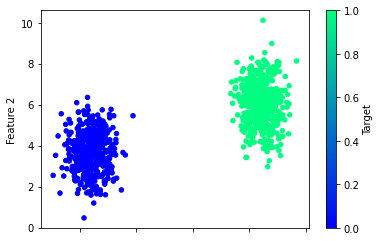

In [10]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")


In [11]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [12]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [13]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()


In [14]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [15]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


In [16]:
# Check the structure of the Sequential model
nn_model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [18]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)


Epoch 1/100
24/24 [==============================] - 0s 909us/step - loss: 0.6514 - accuracy: 0.5920
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6429 - accuracy: 0.6893
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6340 - accuracy: 0.7107
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6244 - accuracy: 0.7227
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6143 - accuracy: 0.7427
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6038 - accuracy: 0.7560
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5930 - accuracy: 0.7693
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5818 - accuracy: 0.7840
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5705 - accuracy: 0.7973
Epoch 10/100
24/24 [==============================] - 0s 964us/step - loss: 0.5588 - accuracy: 0.8027
Epoch

24/24 [==============================] - 0s 1ms/step - loss: 0.1108 - accuracy: 0.9973
Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1087 - accuracy: 0.9973
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1066 - accuracy: 0.9973
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1046 - accuracy: 0.9973
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1026 - accuracy: 0.9987
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1008 - accuracy: 0.9987
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0989 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0971 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0953 - accuracy: 1.0000
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0936 - accuracy: 1.0000
Epoch 92/100


<AxesSubplot:>

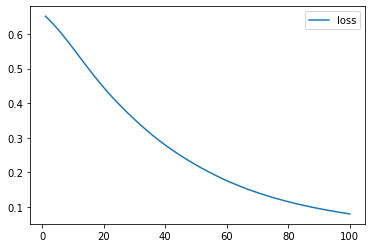

In [19]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

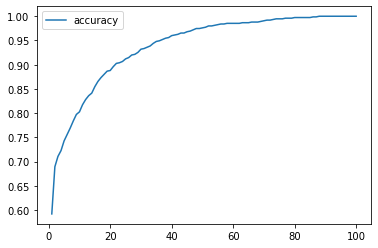

In [20]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0741 - accuracy: 1.0000
Loss: 0.07405099272727966, Accuracy: 1.0


In [22]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

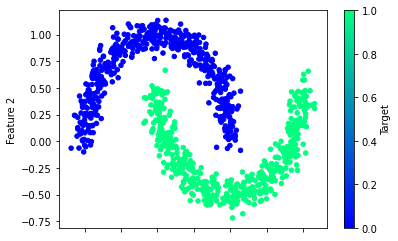

In [23]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")


In [24]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)


In [25]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)


Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 1.2317 - accuracy: 0.4093
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 1.0526 - accuracy: 0.4453
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9392 - accuracy: 0.4747
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8668 - accuracy: 0.4973
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8143 - accuracy: 0.5267
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7722 - accuracy: 0.5493
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7377 - accuracy: 0.5693
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7078 - accuracy: 0.5853
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6816 - accuracy: 0.5973
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6574 - accuracy: 0.6067
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.2723 - accuracy: 0.8907
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2717 - accuracy: 0.8907
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2711 - accuracy: 0.8920
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2705 - accuracy: 0.8920
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2700 - accuracy: 0.8933
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2694 - accuracy: 0.8933
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2689 - accuracy: 0.8933
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2684 - accuracy: 0.8933
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2680 - accuracy: 0.8933
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2674 - accuracy: 0.8933
Epoch 93/100


<AxesSubplot:>

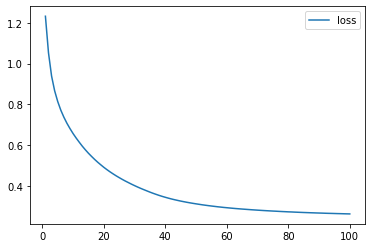

In [26]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")


<AxesSubplot:>

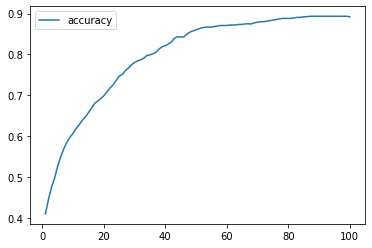

In [27]:
# Plot the accuracy
history_df.plot(y="accuracy")


In [28]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [29]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


In [30]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)


Epoch 1/100
24/24 [==============================] - 0s 963us/step - loss: 0.8381 - accuracy: 0.3707
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7926 - accuracy: 0.4760
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7521 - accuracy: 0.5400
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7151 - accuracy: 0.5587
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6812 - accuracy: 0.5653
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6490 - accuracy: 0.6307
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6186 - accuracy: 0.7560
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5897 - accuracy: 0.8640
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5617 - accuracy: 0.8787
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5351 - accuracy: 0.8933
Epoch 1

24/24 [==============================] - 0s 1ms/step - loss: 0.1624 - accuracy: 0.9360
Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1613 - accuracy: 0.9360
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1601 - accuracy: 0.9360
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1589 - accuracy: 0.9360
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1576 - accuracy: 0.9360
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1565 - accuracy: 0.9360
Epoch 88/100
24/24 [==============================] - 0s 993us/step - loss: 0.1553 - accuracy: 0.9373
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1539 - accuracy: 0.9373
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1527 - accuracy: 0.9373
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1516 - accuracy: 0.9373
Epoch 92/10